In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [43]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/03/01','2007/04/01', data_path)

100%|██████████| 46/46 [07:16<00:00,  9.48s/it]


In [45]:
# Get periods of length 15
periods = market.get_periods_fast(period_length=3600)
print(f"Number of periods: {len(periods)}")

100%|██████████| 8577796/8577796 [07:52<00:00, 18156.32it/s]


Number of periods: 183


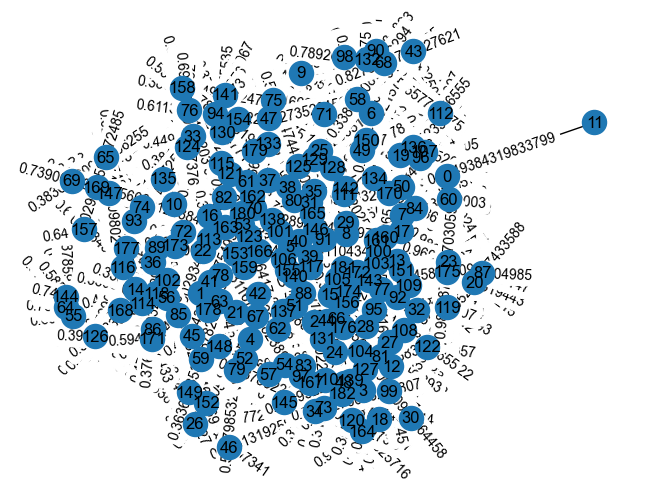

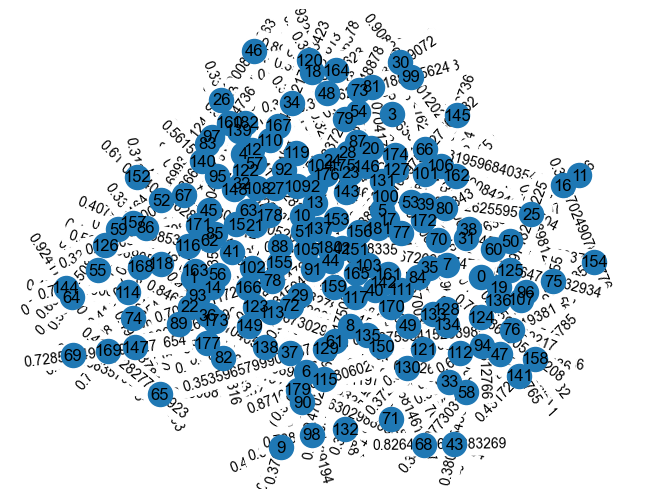

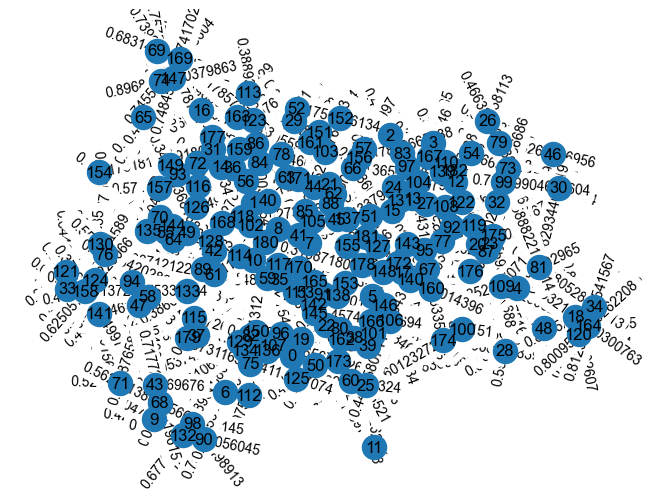

In [55]:
# Build the graph
state_graph_s = market.build_graph(periods, threshold=0.3, inter=True, filter_type='s')
state_graph_g = market.build_graph(periods, threshold=0.3, inter=True, filter_type='g')
state_graph_delta = market.build_graph(periods, threshold=0.3, inter=True, filter_type='delta')

---
### 2 - Clustering

### 2.1 - Louvain Clustering

Filter type: s
Number of nodes: 183
Number of edges: 1051
Number of periods: 183
Number of clusters: 11
Cluster sizes: [7, 21, 11, 32, 15, 11, 20, 25, 16, 15, 9]
Transition matrix: 
[[0.         0.14285714 0.         0.14285714 0.28571429 0.
  0.         0.14285714 0.14285714 0.14285714 0.        ]
 [0.         0.04761905 0.         0.14285714 0.14285714 0.0952381
  0.19047619 0.14285714 0.19047619 0.04761905 0.        ]
 [0.18181818 0.18181818 0.         0.         0.         0.27272727
  0.         0.27272727 0.         0.09090909 0.        ]
 [0.         0.03125    0.125      0.09375    0.09375    0.0625
  0.21875    0.125      0.03125    0.0625     0.15625   ]
 [0.2        0.06666667 0.06666667 0.2        0.         0.06666667
  0.         0.2        0.13333333 0.06666667 0.        ]
 [0.         0.         0.09090909 0.36363636 0.09090909 0.
  0.         0.09090909 0.18181818 0.09090909 0.09090909]
 [0.         0.1        0.1        0.3        0.05       0.05
  0.1        0.05    

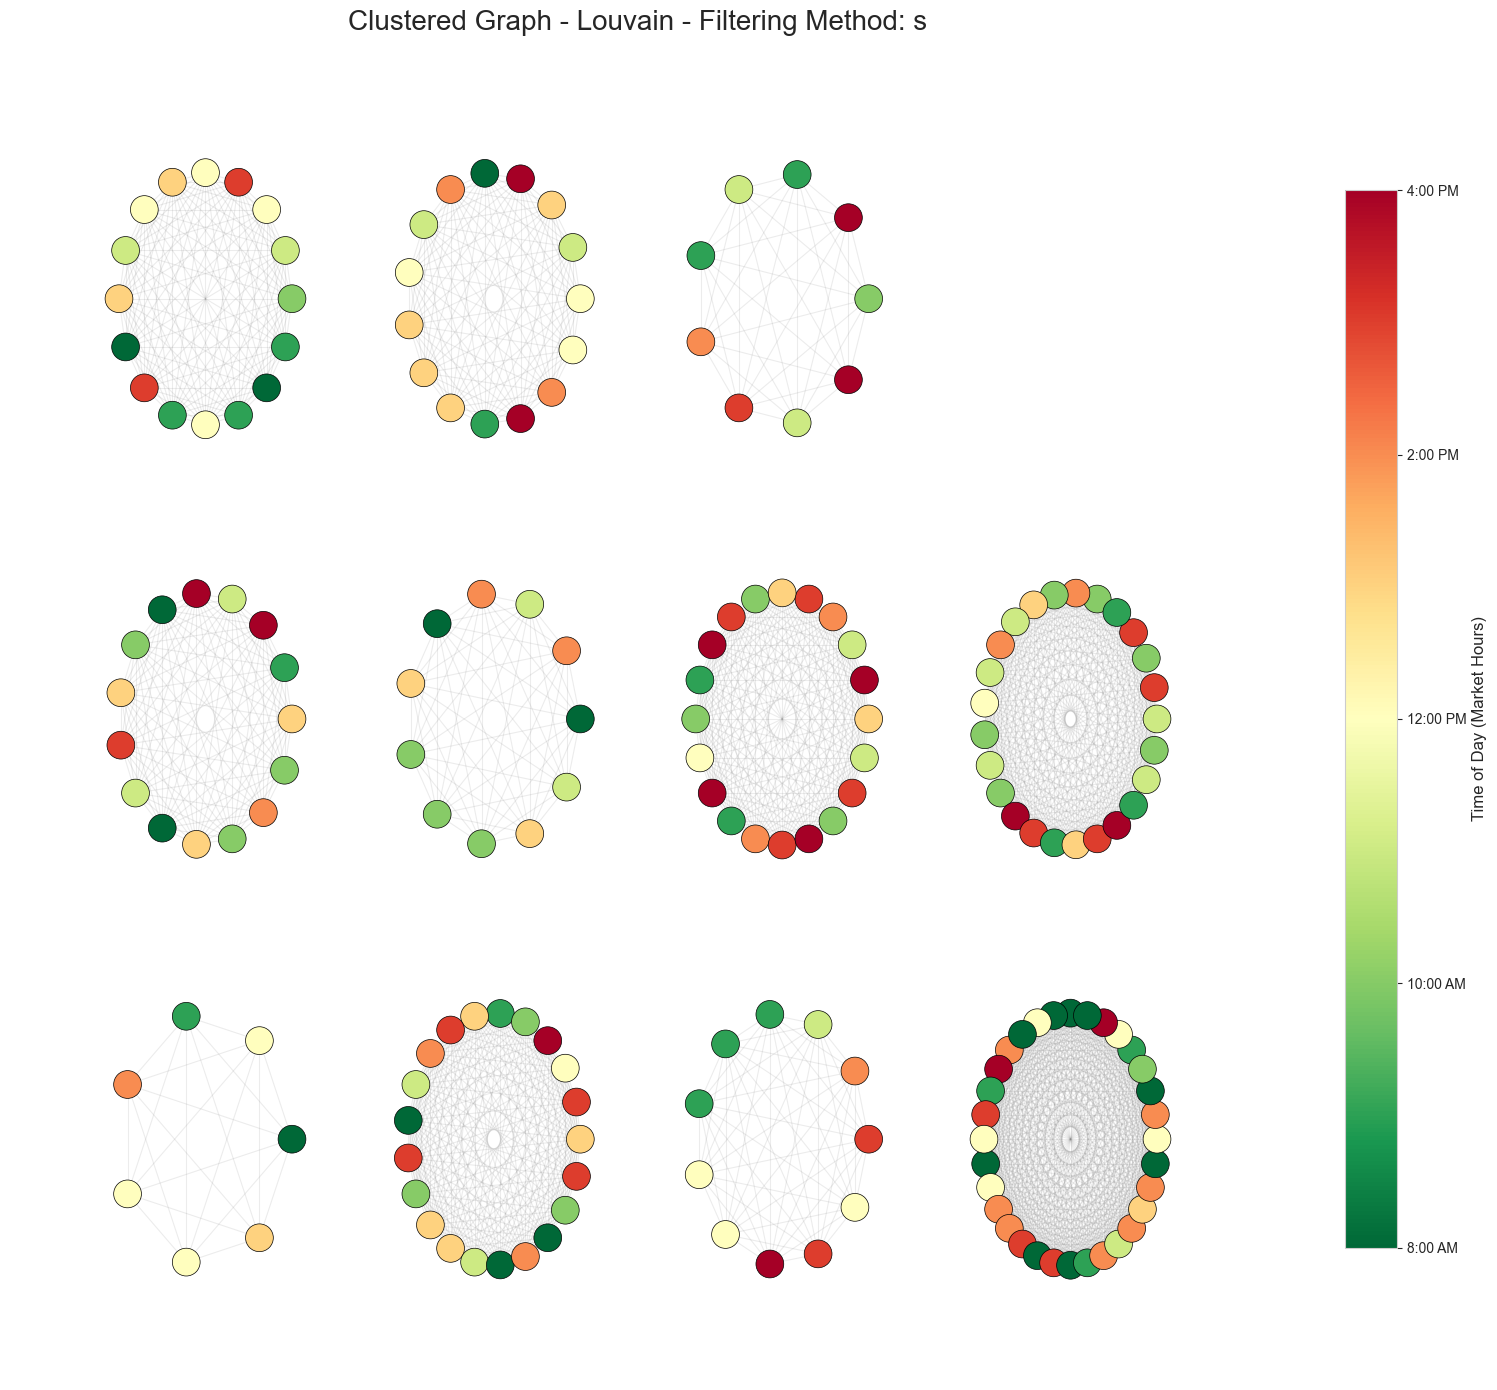

SSV [8.08586235e-04 5.12377239e-01 2.78527593e-01 1.62530922e+01]
SSV [ 0.00103349  0.22295559  0.06693504 -0.04511887]
SSV [ 6.37583066e-04  2.97451483e-02  3.31692410e-03 -9.06745001e-01]
SSV [ 1.04238306e-04  2.21111070e-01  2.54607821e-01 -1.07785971e+00]
SSV [ 1.14770877e-03  7.64990434e-02  3.62491836e-02 -2.39926528e+00]
SSV [ 0.00110053  0.44256977  0.28543873 -0.77654291]
SSV [-2.10699607e-04  1.85413737e-01 -3.25043330e-02 -2.05498722e+00]
SSV [ 2.04481561e-04  1.44911487e-01 -1.75259719e-03 -1.48216505e+00]
SSV [ 3.14359674e-04  1.37770612e-01  1.85159149e-01 -3.24668734e-01]
SSV [-0.00208852  0.21248599  0.12208549 -1.79807108]
SSV [ 2.83099949e-04 -1.38408831e-02 -6.65731641e-02 -1.17049932e+00]


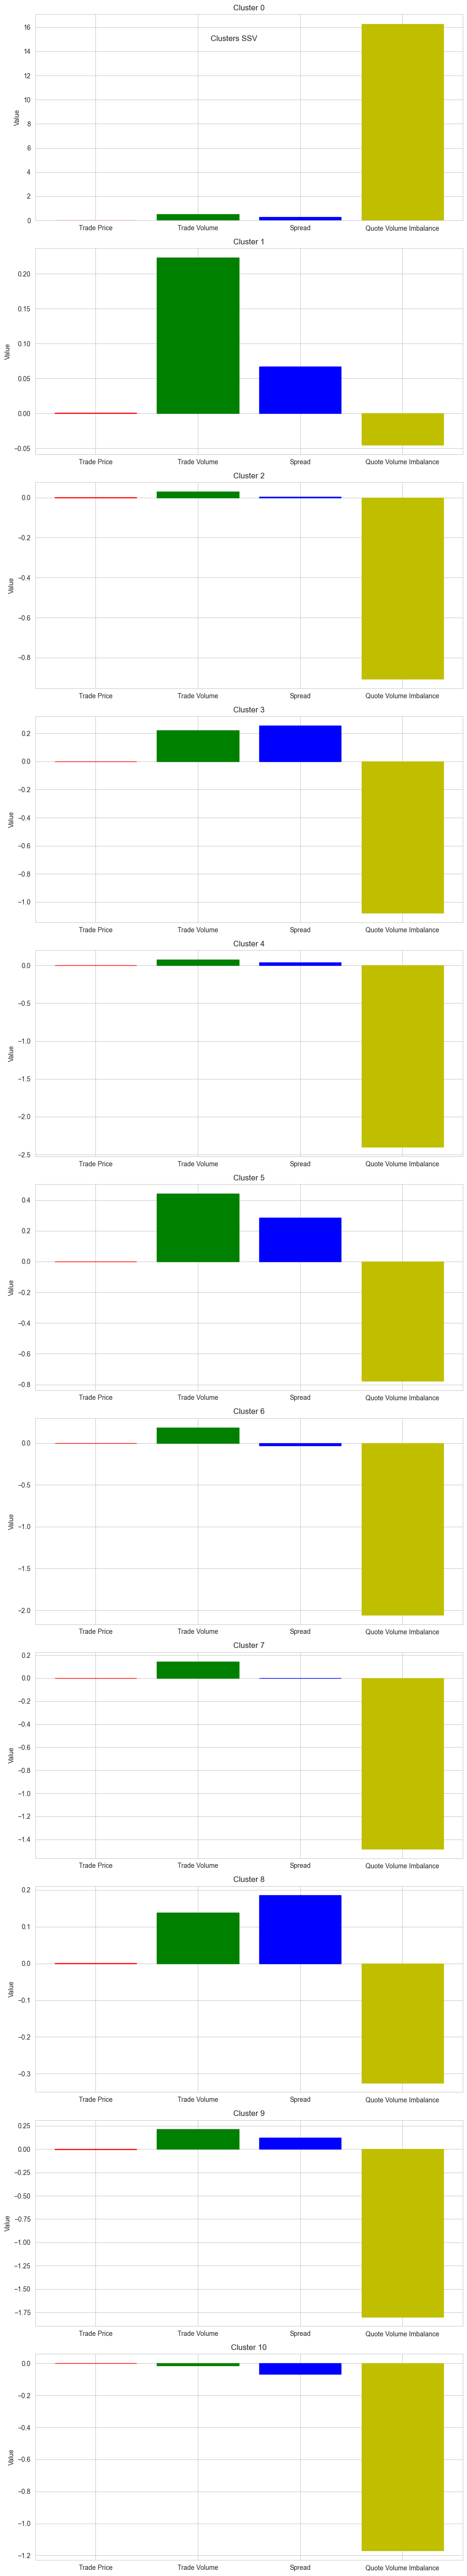

Filter type: g
Number of nodes: 183
Number of edges: 1015
Number of periods: 183
Number of clusters: 11
Cluster sizes: [7, 14, 10, 15, 11, 20, 25, 11, 18, 31, 20]
Transition matrix: 
[[0.         0.14285714 0.         0.28571429 0.         0.14285714
  0.14285714 0.         0.14285714 0.14285714 0.        ]
 [0.         0.         0.         0.         0.         0.07142857
  0.07142857 0.07142857 0.14285714 0.57142857 0.07142857]
 [0.1        0.         0.         0.         0.1        0.2
  0.2        0.         0.         0.1        0.3       ]
 [0.2        0.06666667 0.         0.         0.06666667 0.13333333
  0.2        0.06666667 0.2        0.06666667 0.        ]
 [0.18181818 0.         0.         0.         0.         0.27272727
  0.         0.27272727 0.         0.27272727 0.        ]
 [0.05       0.15       0.         0.2        0.1        0.15
  0.1        0.         0.         0.05       0.2       ]
 [0.         0.08       0.2        0.04       0.12       0.04
  0.08      

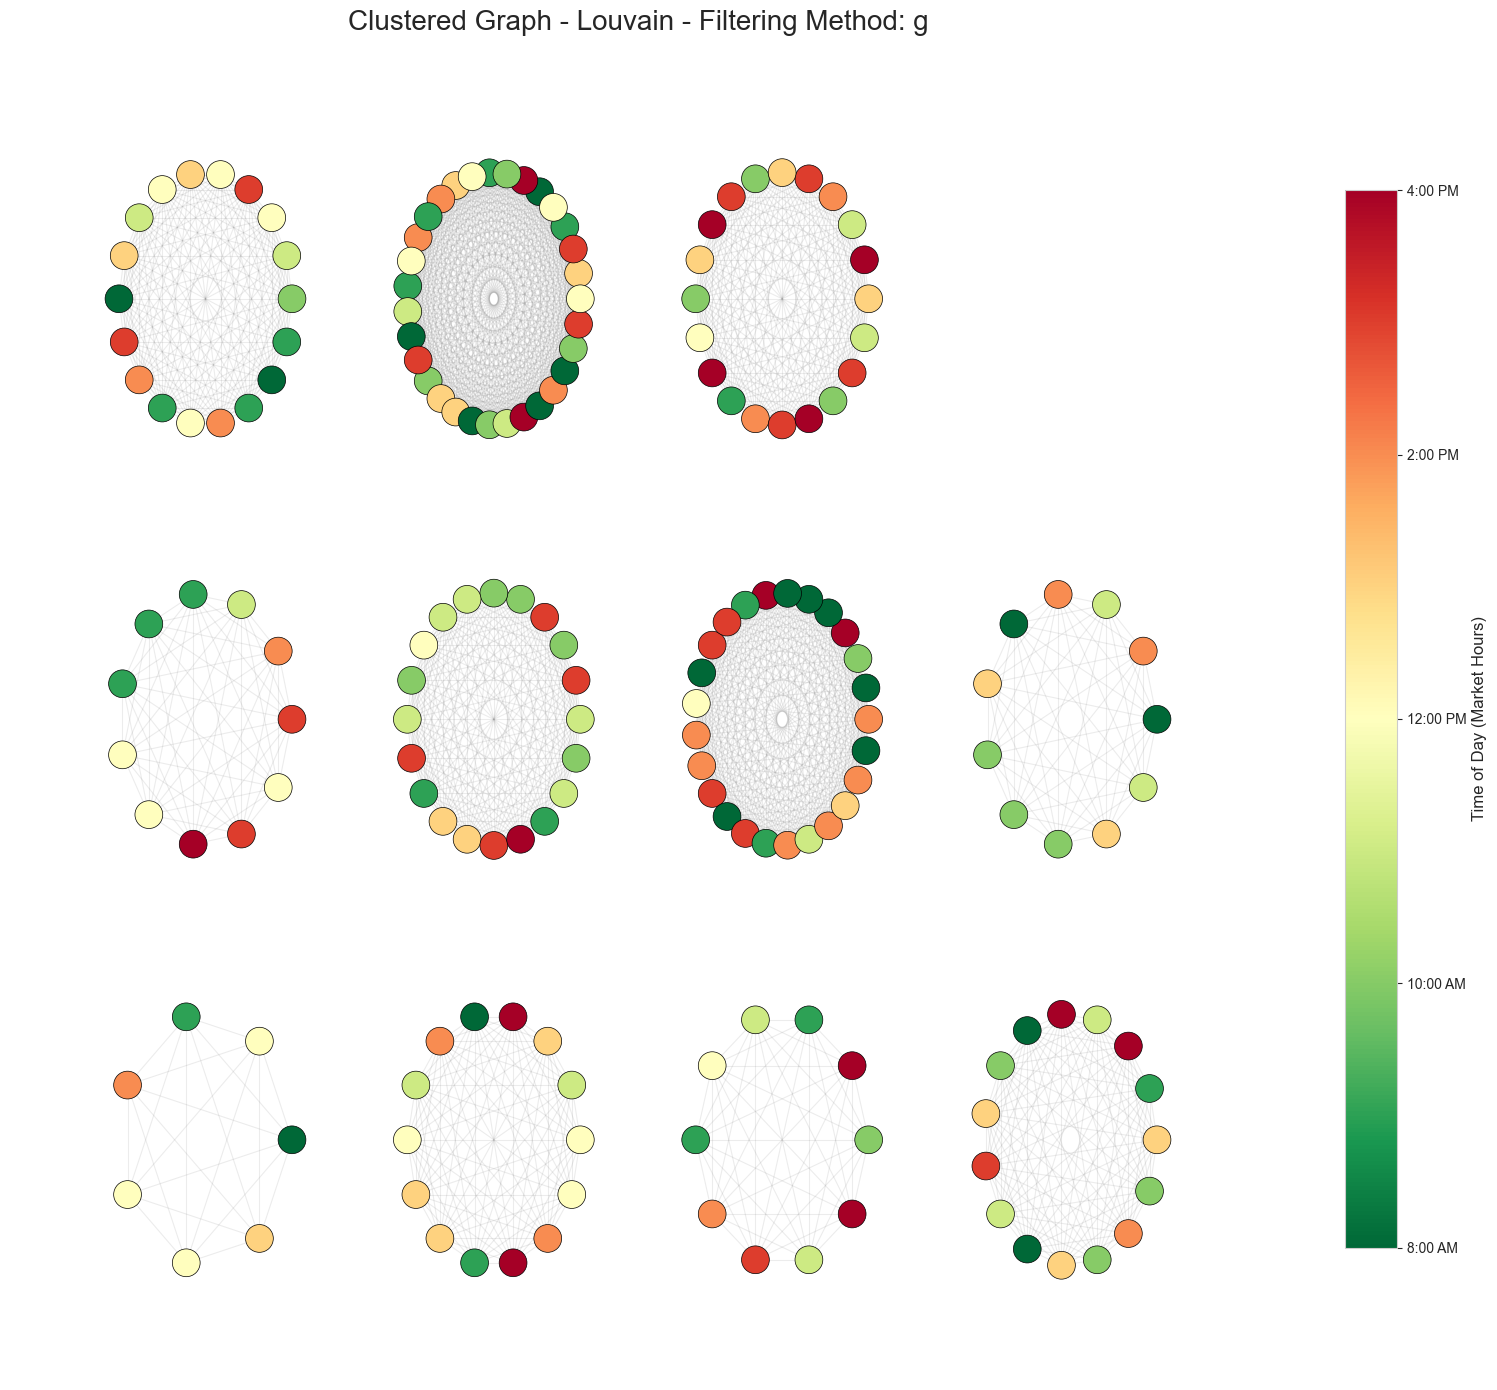

SSV [8.08586235e-04 5.12377239e-01 2.78527593e-01 1.62530922e+01]
SSV [-0.00244817  0.21051032  0.13487067 -1.91337521]
SSV [ 2.69925709e-04 -3.90253126e-02 -8.01807562e-02 -1.40211859e+00]
SSV [ 1.14770877e-03  7.64990434e-02  3.62491836e-02 -2.39926528e+00]
SSV [ 6.37583066e-04  2.97451483e-02  3.31692410e-03 -9.06745001e-01]
SSV [ 5.73640084e-04  1.89650863e-01  7.33286834e-03 -1.72508326e+00]
SSV [ 6.17175221e-04  1.31677719e-01  2.53442190e-01 -1.21105261e+00]
SSV [ 0.00110053  0.44256977  0.28543873 -0.77654291]
SSV [ 0.00041887  0.15968541  0.1643179  -0.33758768]
SSV [-2.40178475e-05  2.61641128e-01  9.62964765e-02 -1.21663774e-01]
SSV [ 3.23337464e-06  1.86433570e-01 -2.29076060e-02 -2.04292815e+00]


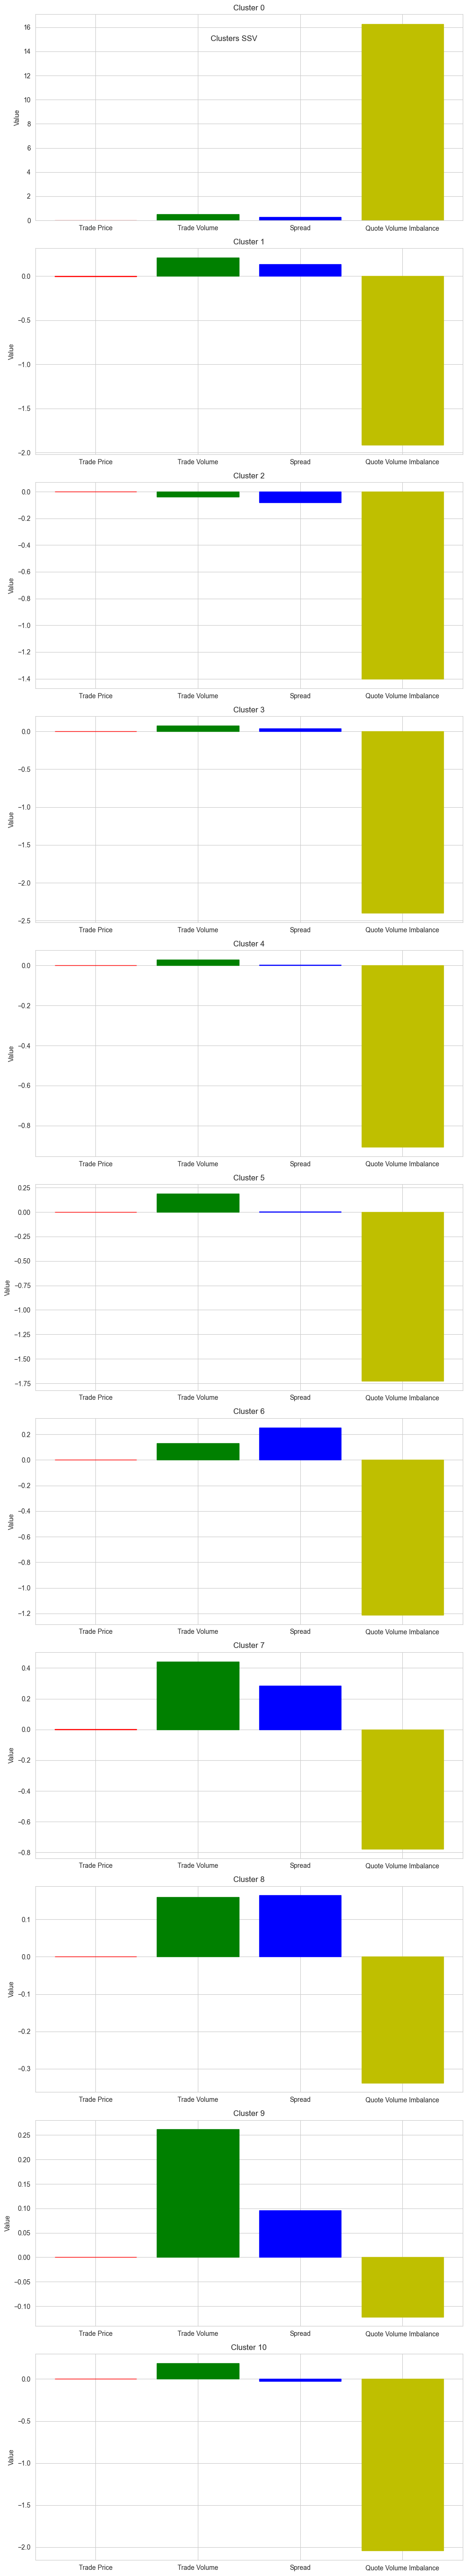

Filter type: delta
Number of nodes: 183
Number of edges: 815
Number of periods: 183
Number of clusters: 11
Cluster sizes: [27, 17, 16, 20, 20, 19, 14, 16, 11, 8, 14]
Transition matrix: 
[[0.22222222 0.18518519 0.14814815 0.03703704 0.11111111 0.11111111
  0.03703704 0.07407407 0.03703704 0.         0.03703704]
 [0.17647059 0.11764706 0.05882353 0.         0.11764706 0.11764706
  0.05882353 0.17647059 0.05882353 0.         0.11764706]
 [0.         0.1875     0.         0.125      0.125      0.0625
  0.125      0.         0.125      0.1875     0.0625    ]
 [0.1        0.         0.         0.1        0.2        0.05
  0.2        0.05       0.1        0.1        0.1       ]
 [0.1        0.1        0.2        0.15       0.15       0.
  0.         0.         0.1        0.05       0.15      ]
 [0.10526316 0.         0.10526316 0.26315789 0.10526316 0.10526316
  0.         0.10526316 0.05263158 0.05263158 0.10526316]
 [0.         0.14285714 0.07142857 0.07142857 0.07142857 0.14285714
  0.0714

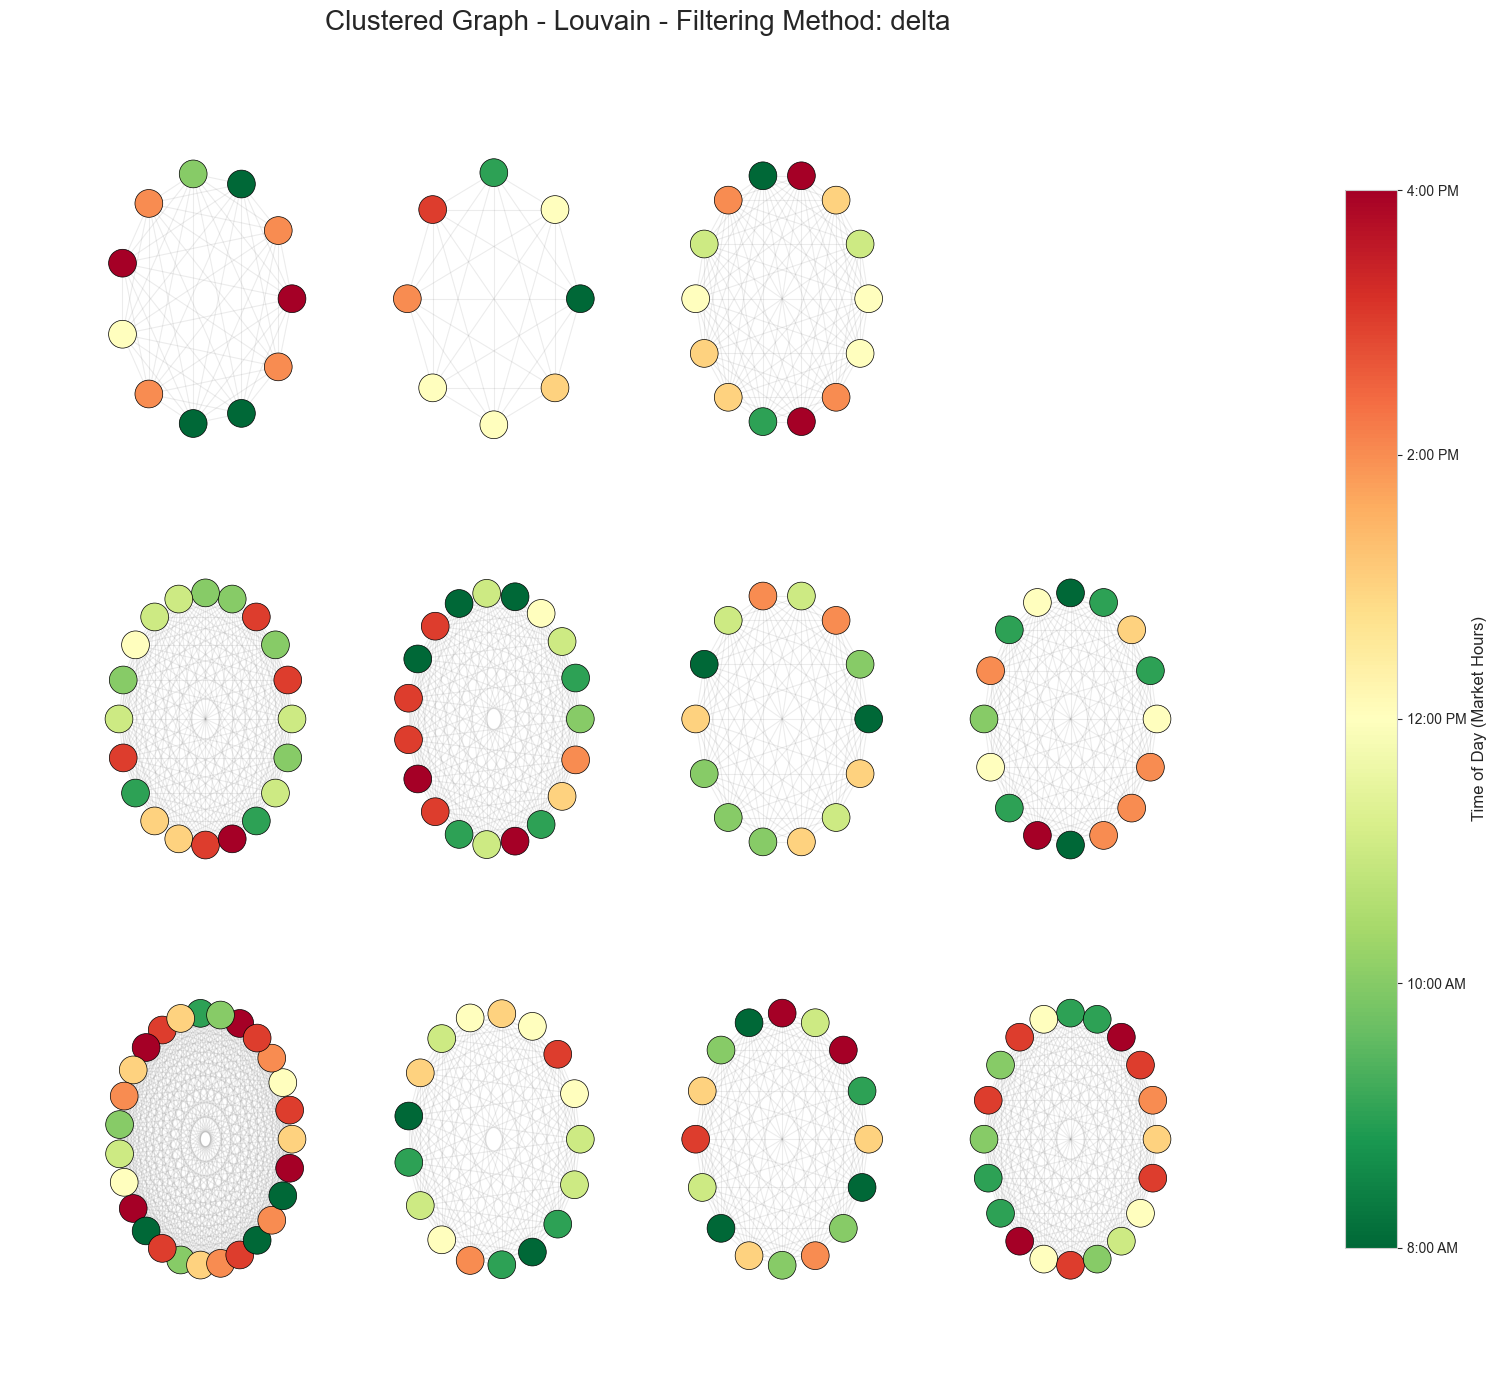

SSV [ 0.00054812  0.21611777  0.05273146 -0.44605536]
SSV [ 3.40121156e-04  1.63512880e-01  2.00635985e-01 -3.82153488e-01]
SSV [ 8.69434284e-04  7.37069936e-02  1.07062304e-01 -2.27641124e+00]
SSV [ 6.40764186e-04 -3.71128433e-04 -3.86523582e-02 -2.63003886e+00]
SSV [ 5.73640084e-04  1.89650863e-01  7.33286834e-03 -1.72508326e+00]
SSV [ 3.99900966e-04 -2.11756630e-02  6.37954528e-02 -6.46142152e-01]
SSV [0.00095255 0.38917396 0.23537407 0.44798574]
SSV [-9.04089755e-04  3.25449012e-01  4.95342956e-02 -9.50778527e-01]
SSV [ 4.10089461e-04  2.16389583e-01  3.41855744e-01 -1.78487573e+00]
SSV [1.08707450e-03 6.40601100e-01 2.31740950e-01 1.40845914e+01]
SSV [-0.00244817  0.21051032  0.13487067 -1.91337521]


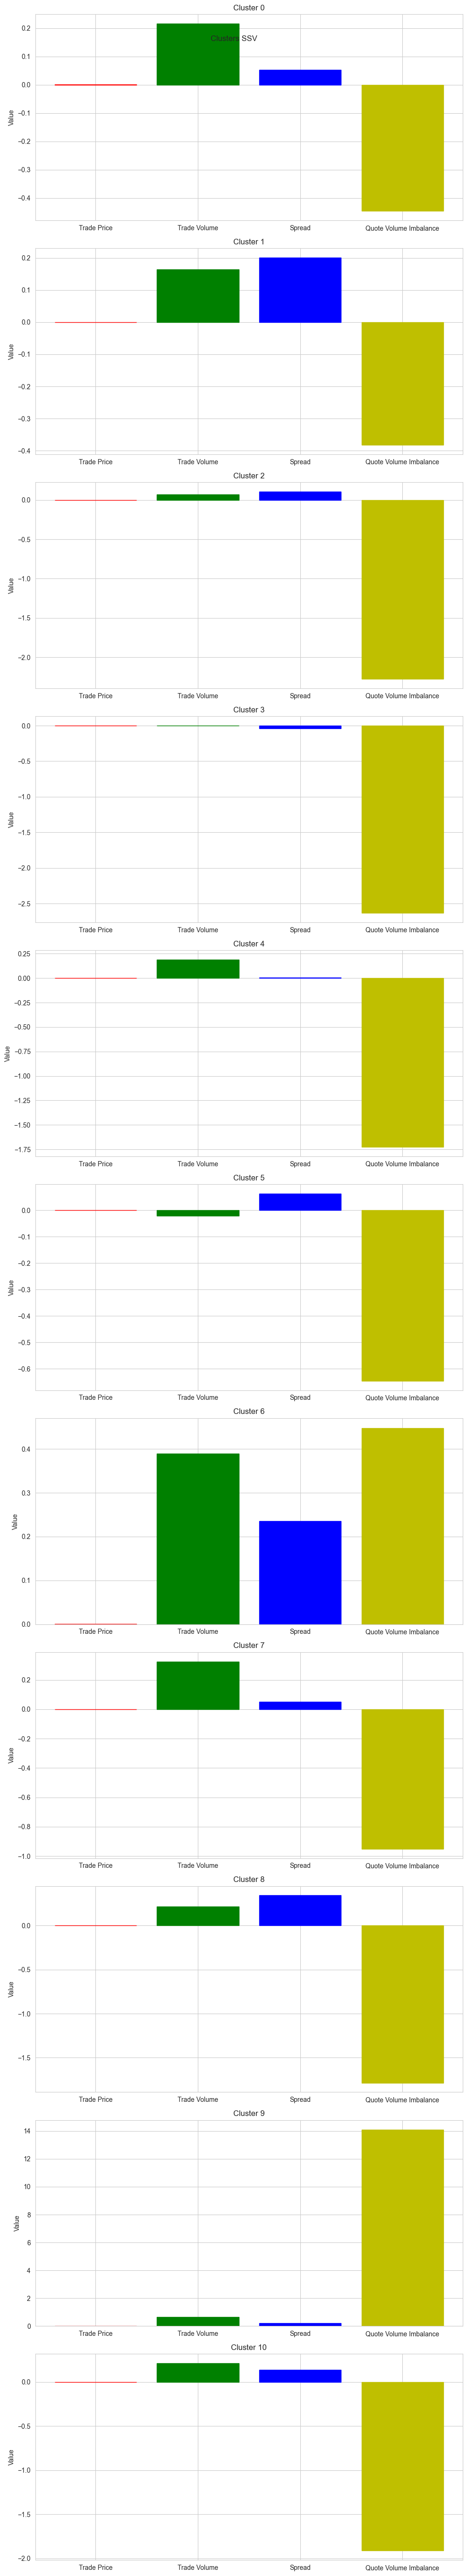

In [56]:
graphs = {
    's': state_graph_s,
    'g': state_graph_g,
    'delta': state_graph_delta
}

for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = LouvainClustering().fit(periods, G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Louvain - Filtering Method: {filter_type}')
    clustering.plot_ssv()

### 2.2 - Greedy Clustering

Filter type: s
Number of nodes: 183
Number of edges: 1051
Number of periods: 183
Number of clusters: 9
Cluster sizes: [30, 24, 24, 23, 21, 19, 19, 15, 7]
Transition matrix: 
[[0.03333333 0.2        0.13333333 0.1        0.1        0.1
  0.13333333 0.2        0.        ]
 [0.16666667 0.04166667 0.16666667 0.16666667 0.25       0.08333333
  0.04166667 0.04166667 0.04166667]
 [0.20833333 0.125      0.04166667 0.16666667 0.04166667 0.20833333
  0.08333333 0.04166667 0.08333333]
 [0.26086957 0.17391304 0.26086957 0.04347826 0.13043478 0.
  0.08695652 0.04347826 0.        ]
 [0.0952381  0.14285714 0.19047619 0.0952381  0.14285714 0.14285714
  0.14285714 0.         0.04761905]
 [0.31578947 0.26315789 0.         0.15789474 0.         0.
  0.10526316 0.15789474 0.        ]
 [0.15789474 0.         0.15789474 0.15789474 0.05263158 0.21052632
  0.05263158 0.05263158 0.15789474]
 [0.2        0.13333333 0.         0.2        0.13333333 0.06666667
  0.13333333 0.13333333 0.        ]
 [0.         0.  

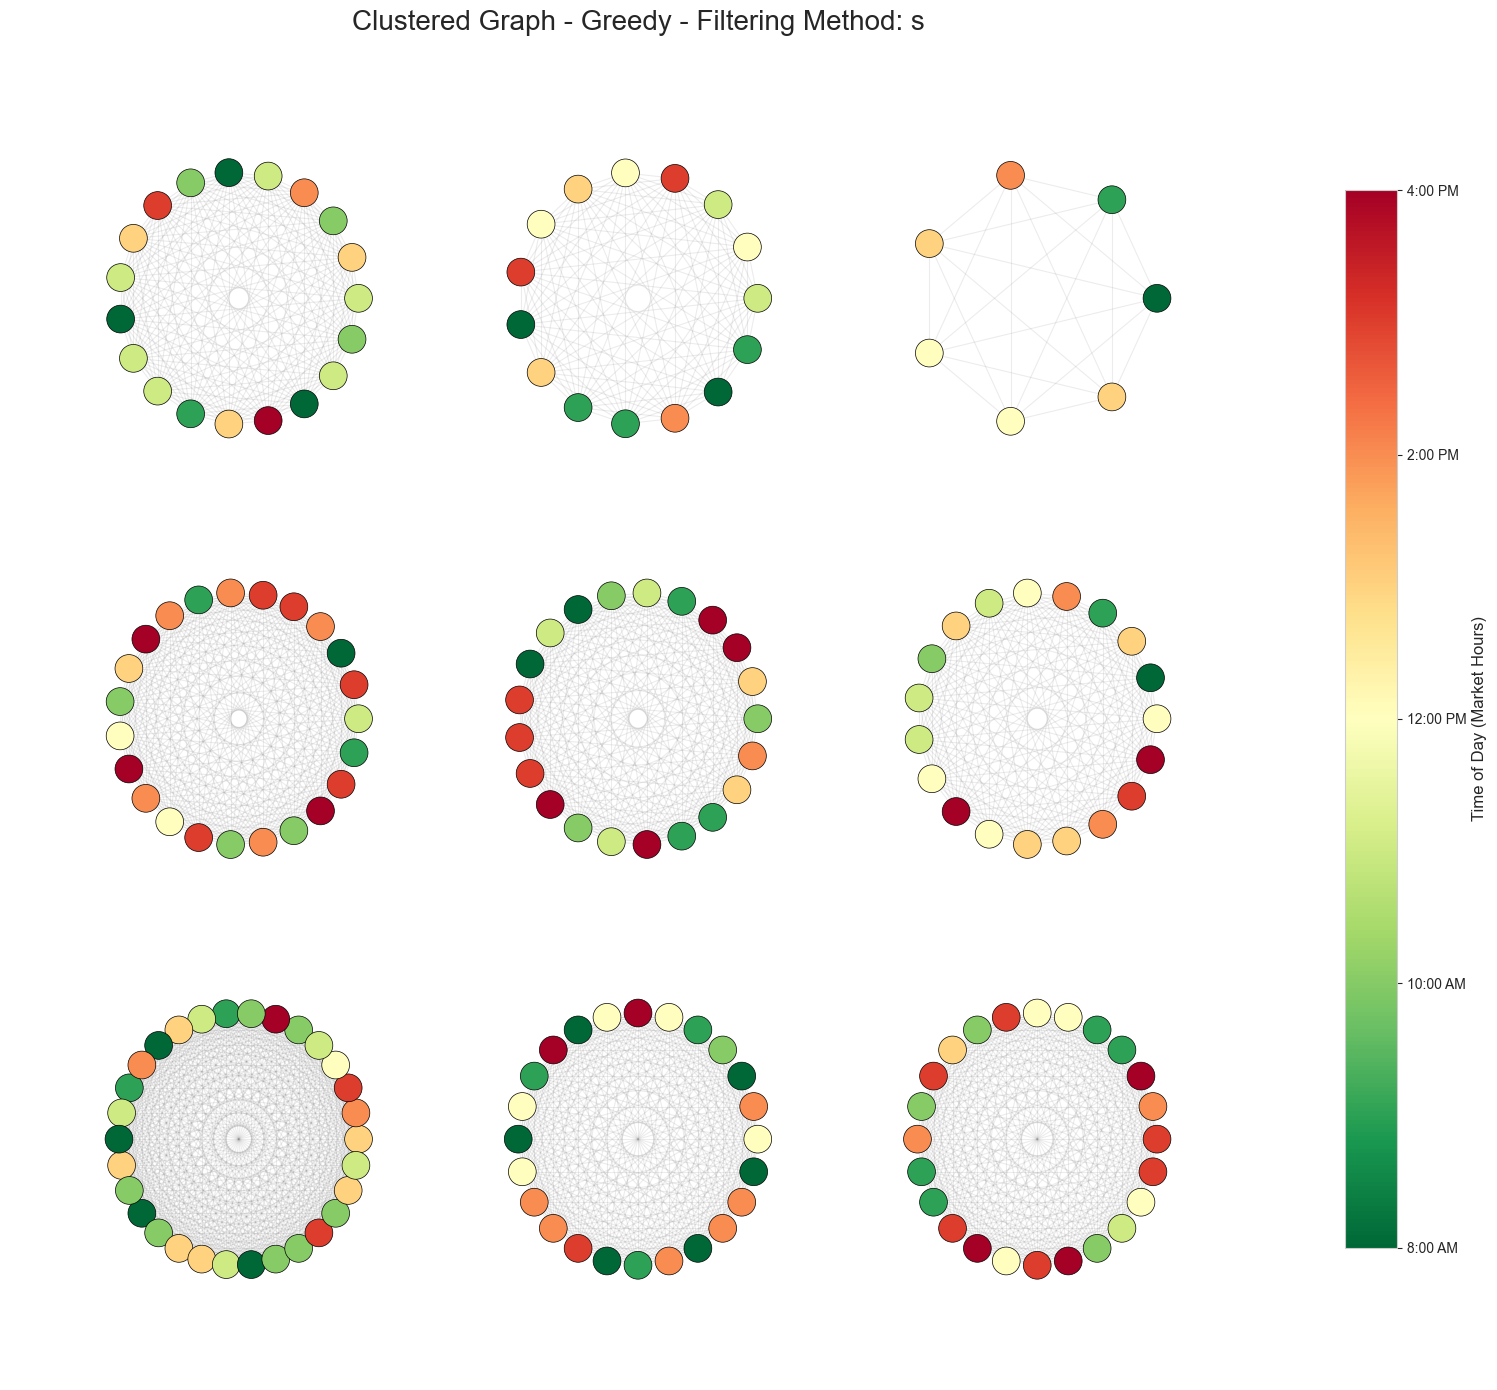

SSV [ 0.00081354  0.2561084   0.12302462 -0.21685209]
SSV [-8.30666592e-05  2.63251575e-01  2.50033864e-01 -1.53645520e+00]
SSV [ 3.81966865e-04  3.74847320e-02 -5.01163337e-02 -1.93975139e+00]
SSV [-1.75513660e-04  2.63975346e-01  3.16256130e-02  5.45098227e-01]
SSV [ 3.34493168e-04  2.27046083e-02 -2.29597529e-02 -1.06534883e+00]
SSV [-1.55112041e-03  1.94181632e-01  9.24112138e-02  2.66119672e+00]
SSV [ 8.54892746e-04  1.07893656e-01  1.88587789e-01 -2.21051488e+00]
SSV [ 6.30137711e-04  2.01155008e-01  1.80691037e-01 -7.25128992e-01]
SSV [0.00191295 0.58277389 0.27717966 0.72241843]


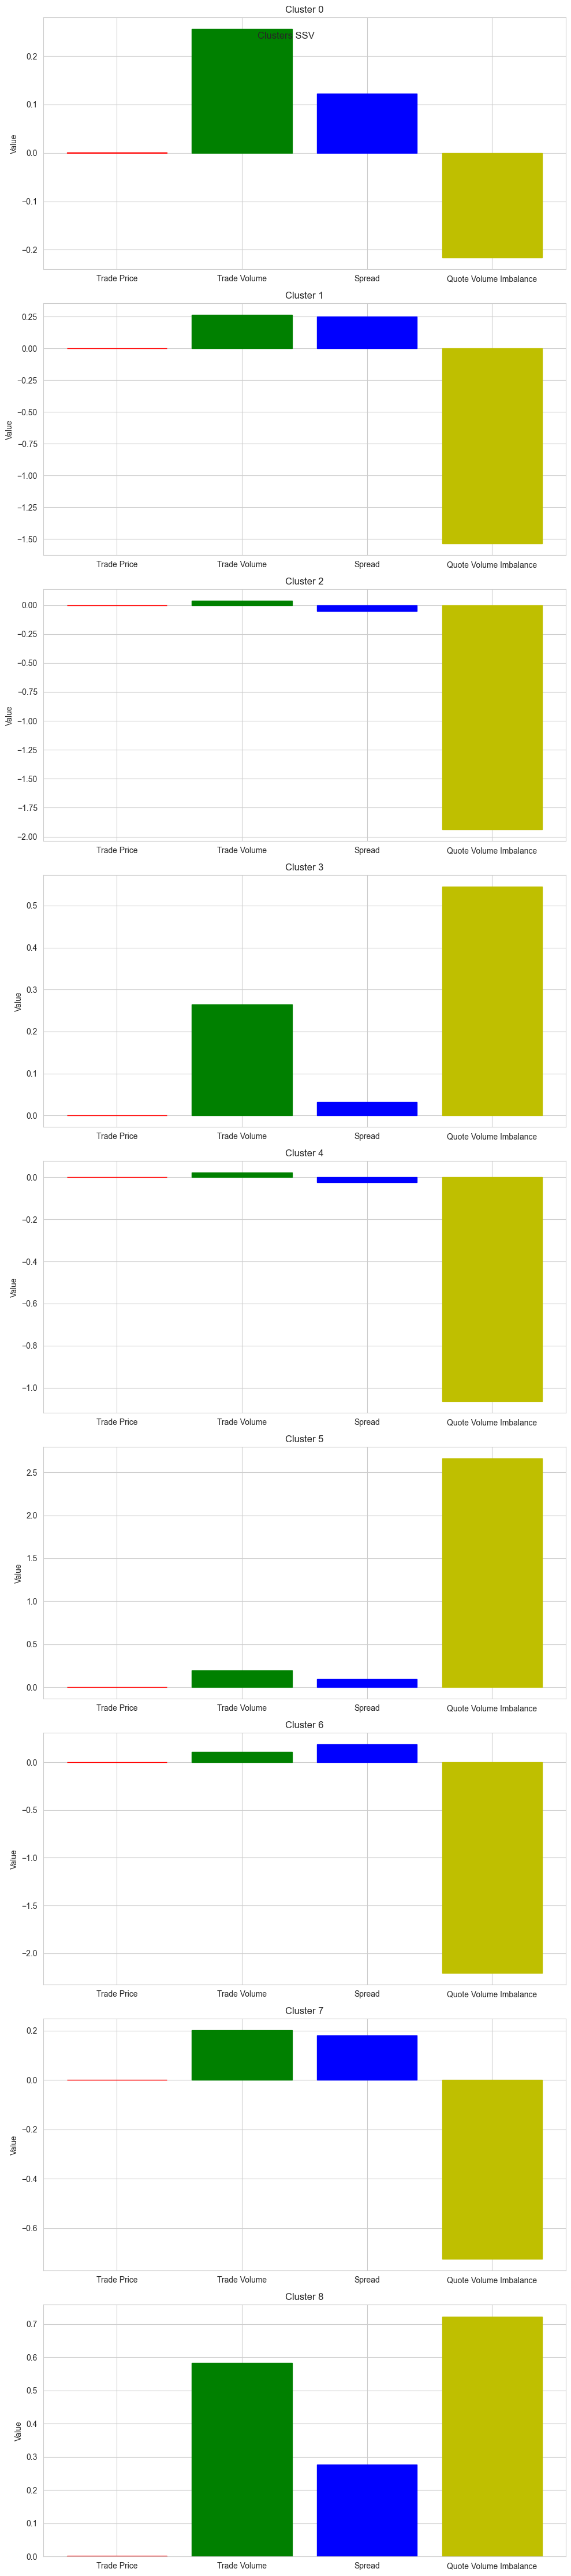

Filter type: g
Number of nodes: 183
Number of edges: 1015
Number of periods: 183
Number of clusters: 11
Cluster sizes: [25, 20, 21, 20, 17, 17, 14, 13, 12, 12, 11]
Transition matrix: 
[[0.12       0.04       0.16       0.08       0.16       0.04
  0.08       0.04       0.04       0.16       0.08      ]
 [0.         0.1        0.2        0.1        0.2        0.05
  0.1        0.1        0.05       0.1        0.        ]
 [0.14285714 0.23809524 0.04761905 0.0952381  0.         0.19047619
  0.         0.04761905 0.04761905 0.         0.19047619]
 [0.2        0.         0.25       0.05       0.05       0.1
  0.05       0.1        0.1        0.         0.1       ]
 [0.05882353 0.23529412 0.11764706 0.17647059 0.05882353 0.11764706
  0.11764706 0.05882353 0.         0.         0.05882353]
 [0.35294118 0.23529412 0.         0.11764706 0.         0.
  0.11764706 0.         0.05882353 0.05882353 0.05882353]
 [0.28571429 0.         0.         0.07142857 0.14285714 0.07142857
  0.07142857 0.1428

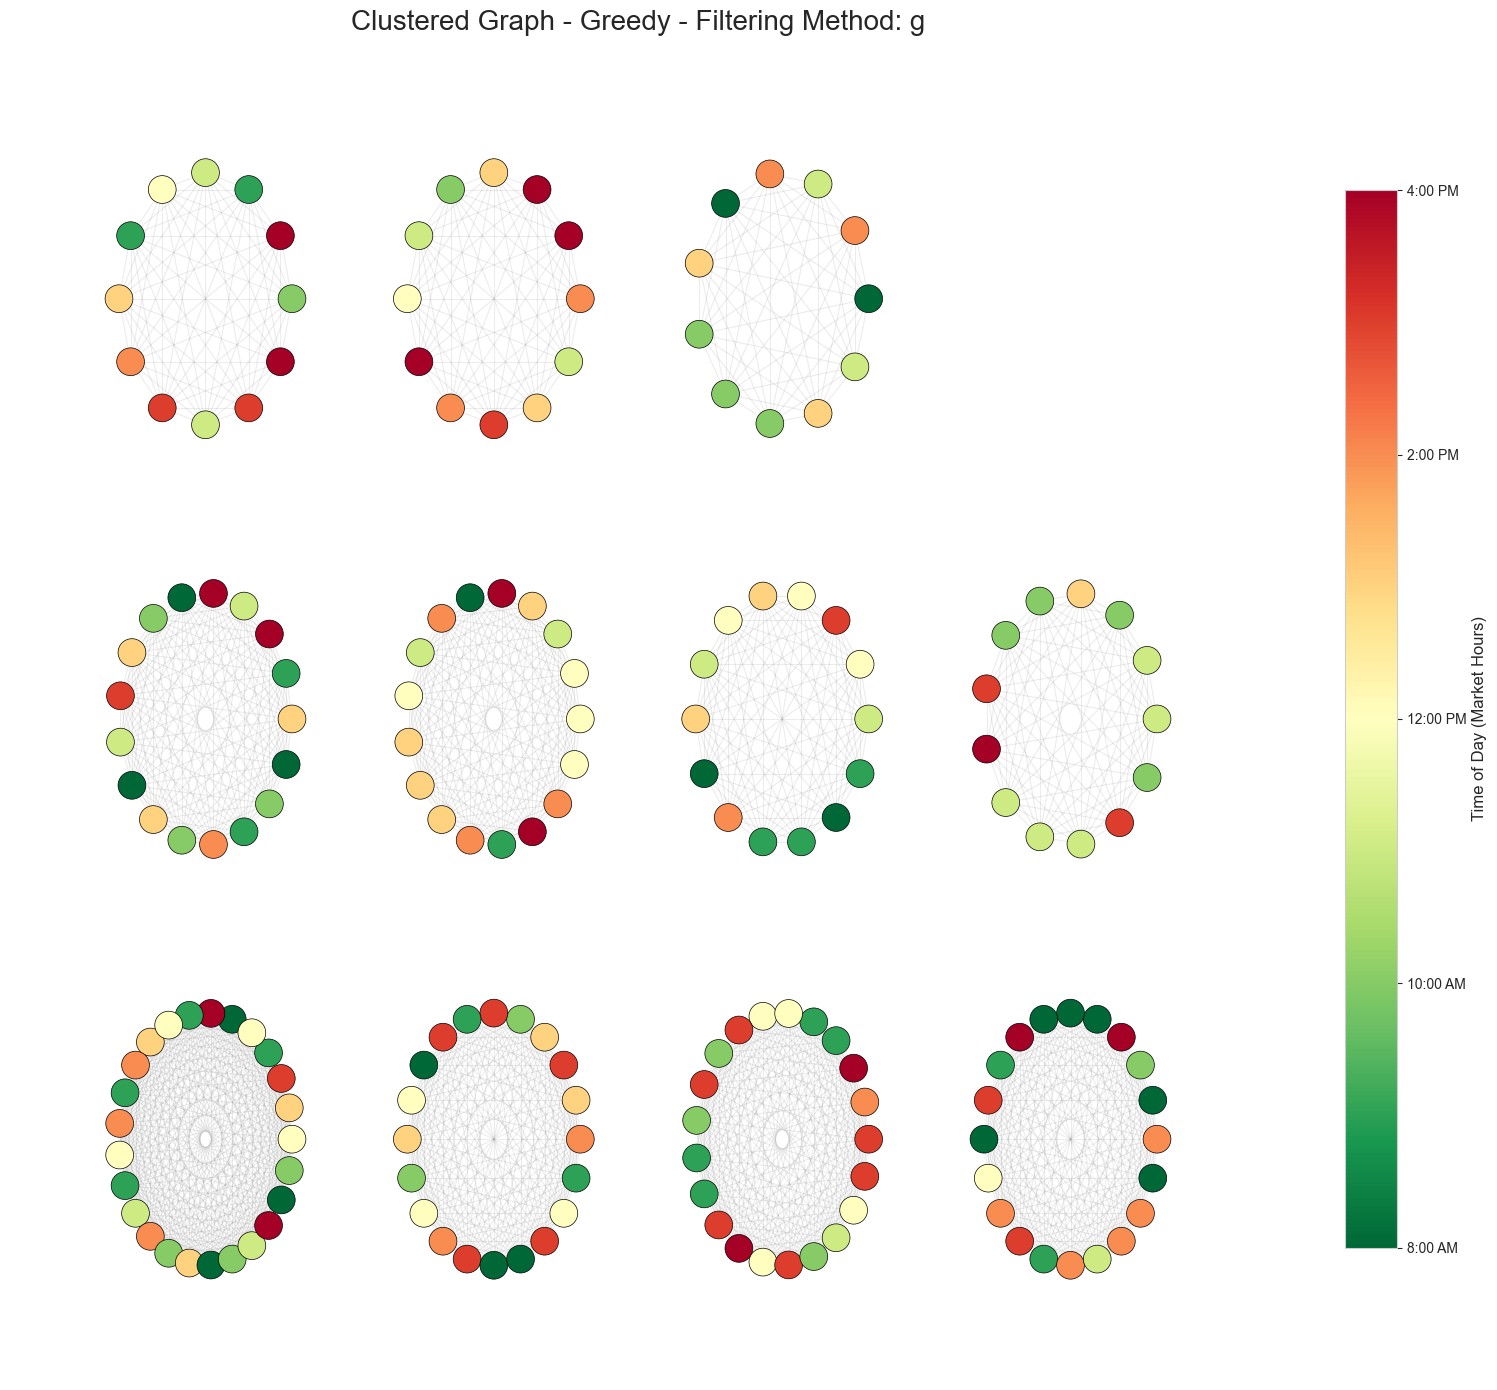

SSV [-1.24694562e-04  2.12366352e-01  5.71273892e-02  1.44501922e-01]
SSV [0.0012445  0.43278448 0.14636468 0.65932908]
SSV [ 4.15255146e-04 -2.43583197e-03 -5.08015643e-02 -2.38183129e+00]
SSV [ 5.82236051e-04  8.88945023e-02  2.86014598e-01 -1.44814890e+00]
SSV [ 9.01037593e-04  7.09148791e-02  8.25104473e-02 -2.09056487e+00]
SSV [-2.02978195e-03  1.90363162e-01  1.15516567e-01  4.79268260e+00]
SSV [ 4.01946212e-04  1.96386772e-01  2.30978818e-01 -7.23935904e-01]
SSV [ 4.56448002e-04  1.61591098e-01  4.98930985e-02 -3.79819793e+00]
SSV [ 1.53976347e-04  6.19469795e-02 -7.66717134e-02 -1.35324632e+00]
SSV [-0.00035682  0.30752357  0.02051016  0.29268914]
SSV [ 0.00110053  0.44256977  0.28543873 -0.77654291]


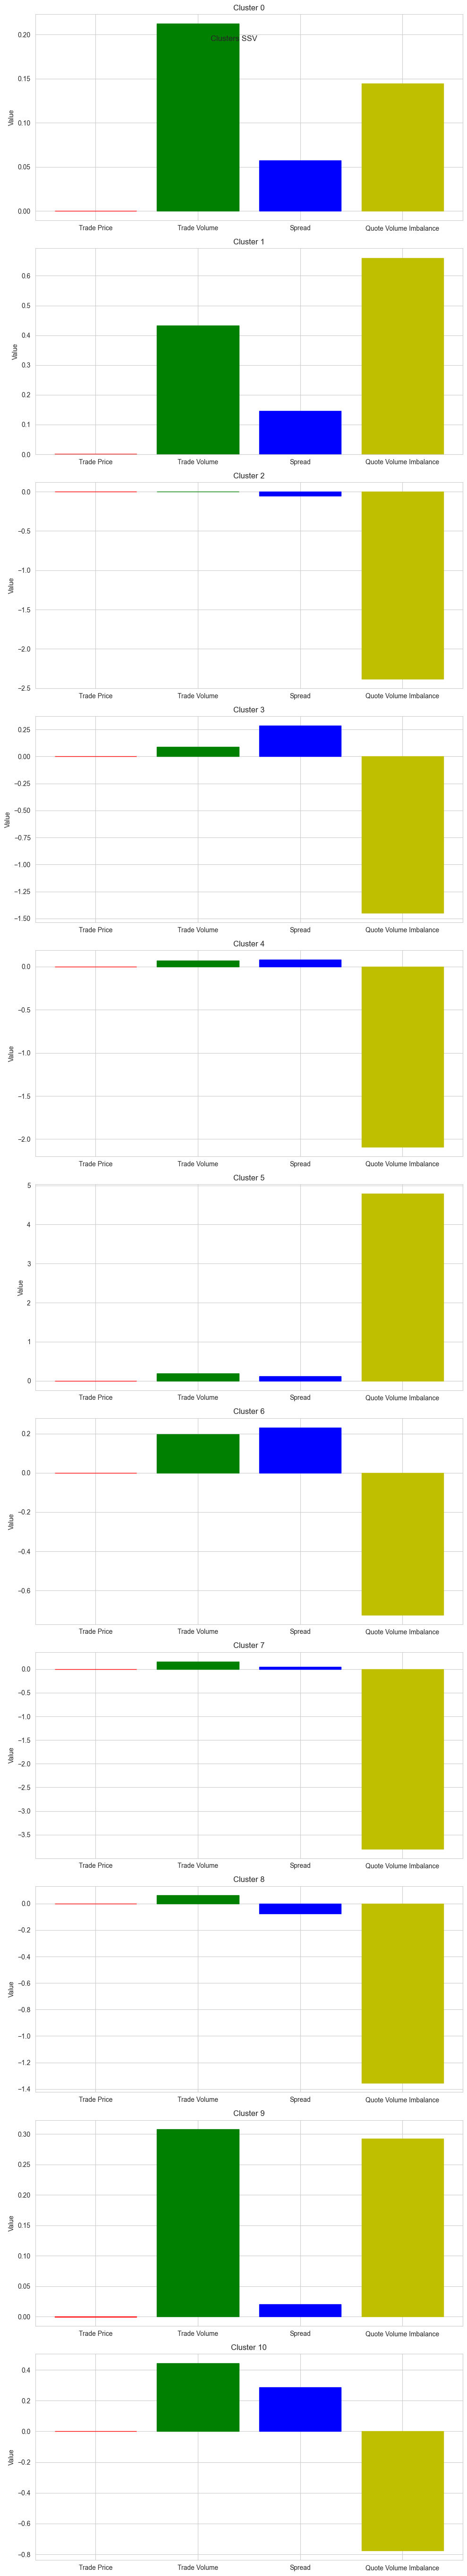

Filter type: delta
Number of nodes: 183
Number of edges: 815
Number of periods: 183
Number of clusters: 10
Cluster sizes: [27, 27, 20, 19, 19, 17, 15, 15, 14, 9]
Transition matrix: 
[[0.14814815 0.22222222 0.         0.03703704 0.22222222 0.11111111
  0.07407407 0.11111111 0.03703704 0.03703704]
 [0.11111111 0.22222222 0.11111111 0.07407407 0.03703704 0.18518519
  0.18518519 0.03703704 0.03703704 0.        ]
 [0.2        0.1        0.1        0.1        0.2        0.1
  0.         0.1        0.         0.1       ]
 [0.15789474 0.15789474 0.31578947 0.         0.10526316 0.10526316
  0.05263158 0.         0.10526316 0.        ]
 [0.15789474 0.10526316 0.05263158 0.10526316 0.05263158 0.
  0.         0.21052632 0.21052632 0.10526316]
 [0.17647059 0.         0.11764706 0.11764706 0.05882353 0.05882353
  0.11764706 0.05882353 0.11764706 0.17647059]
 [0.2        0.13333333 0.13333333 0.2        0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.        ]
 [0.06666667 0.33333333 0.  

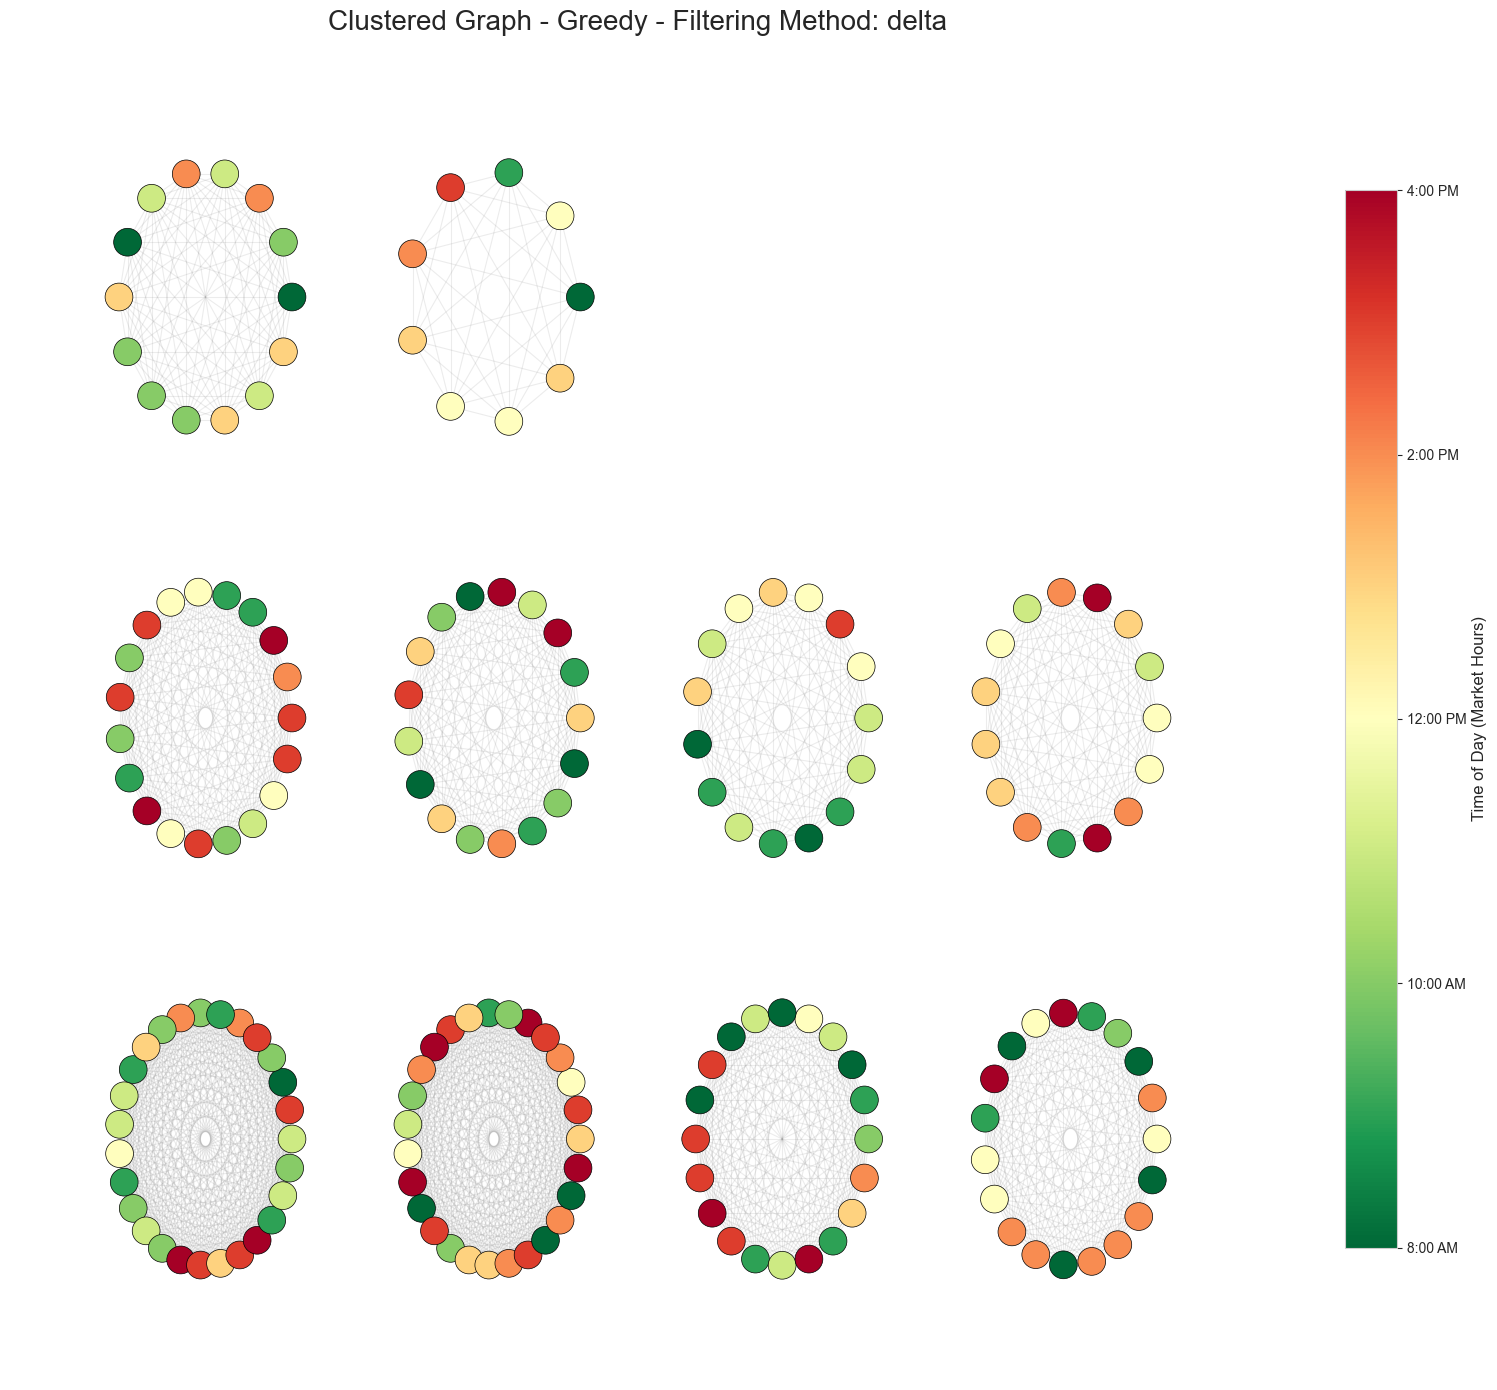

SSV [ 1.28567344e-04  1.46886430e-01  4.26515007e-02 -1.47301052e+00]
SSV [ 3.94060636e-04  2.34115338e-01  4.85132329e-02 -4.37644766e-01]
SSV [-5.84458862e-04  2.83422657e-02  1.34991888e-01 -7.19376747e-01]
SSV [-1.03360667e-04  3.36632970e-01  1.98758053e-01 -1.68717215e+00]
SSV [ 4.71428045e-04  5.30435697e-03 -3.09353766e-02 -2.46988401e+00]
SSV [ 9.01037593e-04  7.09148791e-02  8.25104473e-02 -2.09056487e+00]
SSV [ 3.27020287e-04  1.59737272e-01  2.23681153e-01 -6.89866222e-01]
SSV [-6.99448636e-04  1.51365756e-01  2.26441471e-02 -1.70754275e+00]
SSV [0.00095255 0.38917396 0.23537407 0.44798574]
SSV [1.29998578e-03 6.23787759e-01 2.20098591e-01 1.25735104e+01]


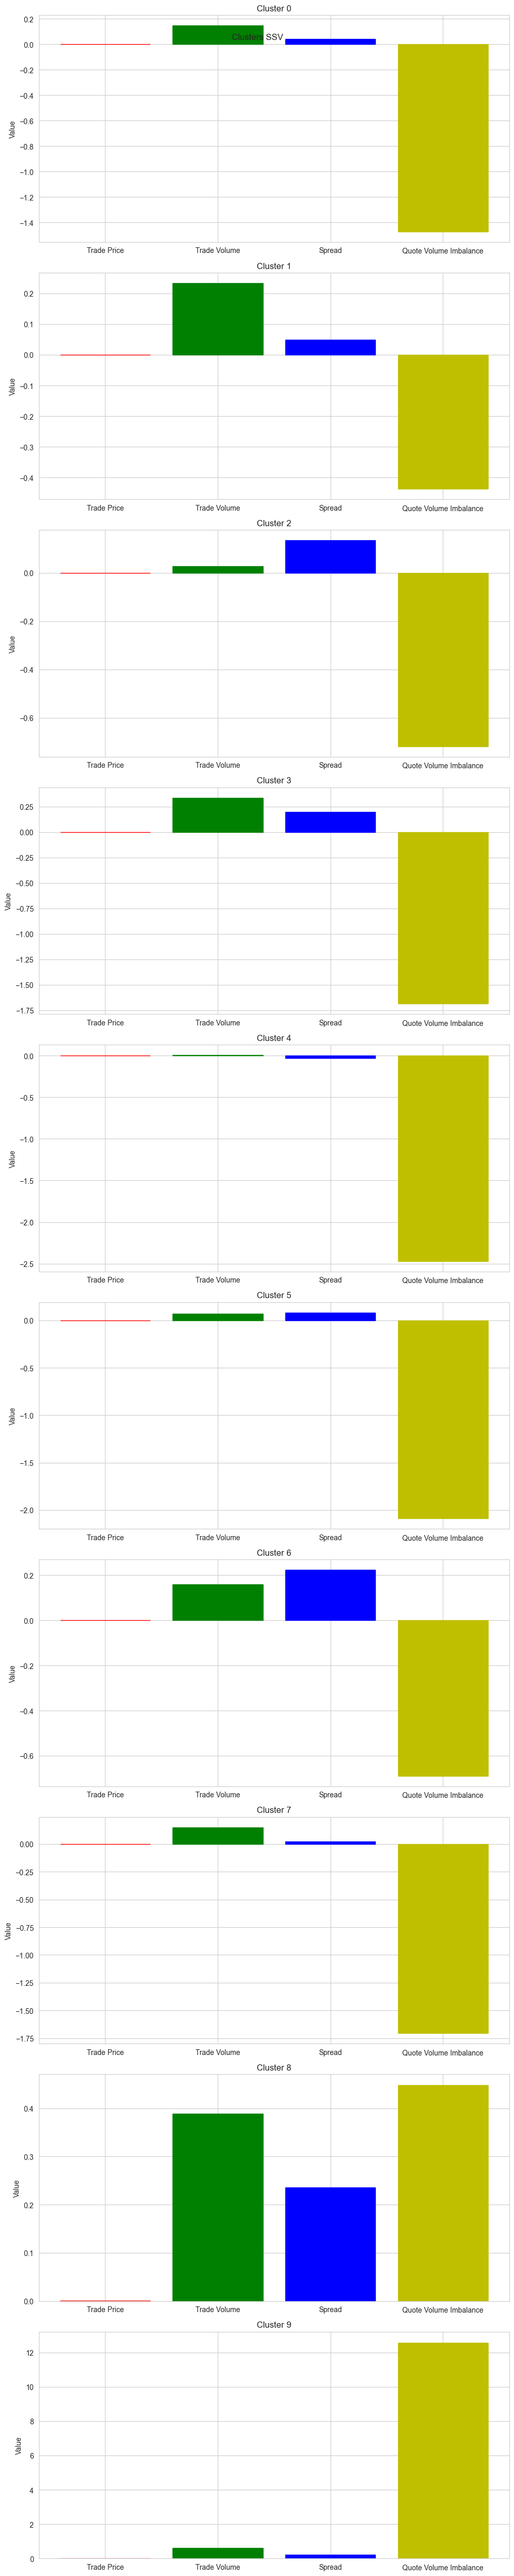

In [57]:
for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = GreedyClustering().fit(periods,  G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Greedy - Filtering Method: {filter_type}')
    clustering.plot_ssv()